## Aim

This notebook aims to provide some plots of $\delta^{18}$O and $\delta^{2}$H values of ice and water samples in dual isotope space, as well as some comparison with local meteoric water lines. We are making use of the pandas library for the handling of timeseries, as well as a mixture of plotting style from the seaborn package and the pyleoclim 'journal' style. A custom script for reading the WISER data is also called upon.

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


## Loading up useful modules and custom scripts

In [2]:
# first input some library imports
import pandas as pd
import matplotlib.pyplot as plt
import pyleoclim as pyleo
import numpy as np
import seaborn as sns

from calendar import month_abbr

# import local library
import scripts.GNIP as gnip

In [3]:
pd.set_option('precision', 2)   # set-up the display of stable isotope values to 2 decimal points.
pyleo.utils.plotting.set_style('journal')

## Dual isotope space plots

### Custom reader method for stable isotopes in cave

In [4]:
# read the data from the isotope sampling at Migovec, into a pandas dataframe
cave = gnip.ReadCustom('data/isotopes/isotopes_migovec.csv')

### Custom reader method for stable isotopes in precipitation at the Northern Adriatic.

In [5]:
# read the data from GNIP into a dataframe
regional = gnip.ReadArchive('data/isotopes/GNIP_archive_slovenia.csv')

Now that the different modules and their respective functions are loaded, we are ready to explore the data and plot the results in d2H/d18O space.

In [6]:
cave.head()

s.d. height  d18O  \
cave protocol transect samplename column height (cm)                      
M15  DRIP     -999.0   MIG-77D    -999.0                   -999.0 -9.06   
                       MIG-78D    -999.0                   -999.0 -8.89   
     FIRN      2.0     MIG-71      200.0                      5.0 -5.92   
                       MIG-72      220.0                      5.0 -5.51   
                       MIG-73      240.0                      5.0 -5.09   

                                                      s.d. d18O    d2H  \
cave protocol transect samplename column height (cm)                     
M15  DRIP     -999.0   MIG-77D    -999.0                   0.08 -58.00   
                       MIG-78D    -999.0                   0.06 -56.67   
     FIRN      2.0     MIG-71      200.0                   0.04 -36.43   
                       MIG-72      220.0                   0.08 -33.52   
                       MIG-73      240.0                   0.05 -30.48   

                                                      s.d. d2H  layer   \
cave protocol transect samplename column height (cm)                     
M15  DRIP     -999.0   MIG-77D    -999.0                  0.33  -999.0   
                       MIG-78D    -999.0                  0.28  -999.0   
     FIRN      2.0     MIG-71      200.0                  0.33     5.0   
                       MIG-72      220.0                  0.25     5.0   
                       MIG-73      240.0                  0.11     5.0   

                                                      layer type  d-excess  \
cave protocol transect samplename column height (cm)                         
M15  DRIP     -999.0   MIG-77D    -999.0                  -999.0     14.48   
                       MIG-78D    -999.0                  -999.0     14.45   
     FIRN      2.0     MIG-71      200.0                     0.0     10.93   
                       MIG-72      220.0                     0.0     10.56   
                       MIG-73      240.0                     0.0     10.24   

                                                      s.d. d-excess  
cave protocol transect samplename column height (cm)                 
M15  DRIP     -999.0   MIG-77D    -999.0                       0.34  
                       MIG-78D    -999.0                       0.29  
     FIRN      2.0     MIG-71      200.0                       0.33  
                       MIG-72      220.0                       0.26  
                       MIG-73      240.0                       0.12

Figure saved at: "outputs/f07.pdf"
Figure saved at: "../reports/M17_manuscript/figures/f07.pdf"


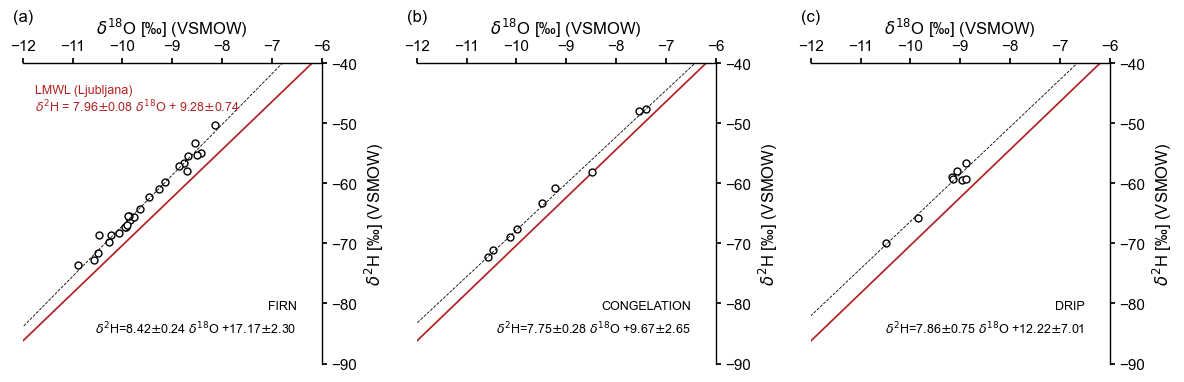

In [7]:
## set up the figure environment
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

## perform some sub-sampling of M-17 isotope data to be plotted
# firn samples from M-17 cave
firn = cave.loc[('M17','FIRN')].copy()

# dripwater from M-17 and M-15
drip = cave.xs('DRIP', level=1, drop_level=False).copy()

# congelation ice (both from floor and speleothems)
congel = pd.concat((cave.loc[('M17','ICICLE'),:].query('d18O >-12'),
           cave.loc[('M17','MELTICE'),:].query('d18O >-12'))).copy()

labels = ("FIRN","CONGELATION","DRIP")

for dat,ax,l,s in zip((firn,congel,drip),(ax1,ax2,ax3), labels, 'abc'):
    
    # make arrays of the isotopic data
    xi,yi =dat['d18O'].to_numpy(),dat['d2H'].to_numpy()
    # compute the PWLSR locally to get the coefficients and plot them
    f,coeffs = gnip.PWLSR(regional,'LJUBLJANA')
    
    # call the custom plotting function on each dataset
    gnip.PlotLMWL(ax,regional,'LJUBLJANA',xi,yi,l,(-6.5,-85),**{'ha':'right'})
    
    ax.set_xlim(-12,-6)
    ax.set_ylim(-90,-40)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.text(-12.2,-33,'({})'.format(s))
    ax.grid()


# plot the local meteoric waterline equation but only on the first subplot
ax1.text(-11.75,-45, 'LMWL (Ljubljana)', color = 'firebrick', fontsize = 9)
ax1.text(-11.75,-48,color = 'firebrick',fontsize = 9,
         s ="$\delta^2$H = {:.2f}$\pm${:.2f} $\delta^{{18}}$O + {:.2f}$\pm${:.2f}"\
         .format(coeffs['slope'],
                 coeffs['$\\sigma_{a(w)}$'],
                 coeffs['intercept'],
                 coeffs['$\\sigma_{b(w)}$']))


plt.tight_layout()
pyleo.savefig(fig,"outputs/f07.pdf", settings = {'dpi':300})
pyleo.savefig(fig,"../reports/M17_manuscript/figures/f07.pdf", settings = {'dpi':300})
pyleo.showfig(fig)
pyleo.closefig(fig)

## Plotting Ljubljana basic statistics

In [8]:
lj = regional.loc['LJUBLJANA'].copy()

In [9]:
lj['d-excess'] = lj['H2']-lj['O18']*8

In [10]:
va = regional.loc['VILLACHER ALPE'].copy()

In [11]:
# a supplementary figure for the boxplots of precip by quarter.
def Monthly(var):
    monthly = np.array([lj.loc[lj.index.month == i+1][var].dropna().to_numpy() for i in range(12)],dtype = object)
    return monthly

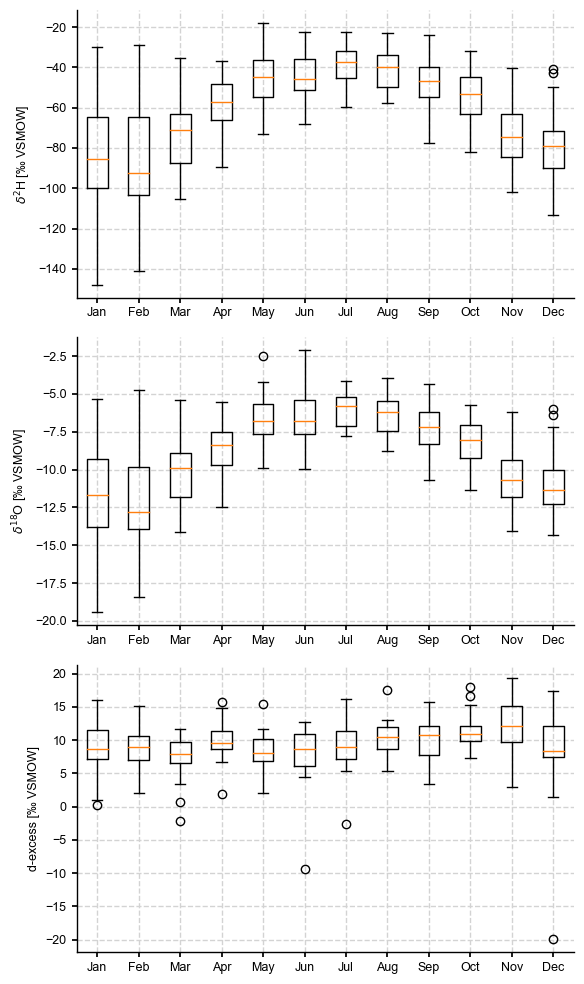

Figure saved at: "outputs/sf10.pdf"
Figure saved at: "../reports/M17_manuscript/figures/sf10.pdf"


In [12]:
fig, axes = plt.subplots(3,1,figsize = (6,10))

m = [i for i in month_abbr][1:]

varlabels = {'H2':'$\delta^2$H [‰ VSMOW]',
       'O18':'$\delta^{18}$O [‰ VSMOW]',
       'd-excess': 'd-excess [‰ VSMOW]'}

for ax,(var,label) in zip(axes, varlabels.items()):
    ax.boxplot(Monthly(var),labels =m)
    ax.set_ylabel(label,fontsize = 9)
    ax.tick_params(axis='both', which='major', labelsize=9)

plt.tight_layout()
pyleo.showfig(fig)
pyleo.savefig(fig,'outputs/sf10.pdf',settings = {'dpi':300})
pyleo.savefig(fig,'../reports/M17_manuscript/figures/sf10.pdf',settings = {'dpi':300})
pyleo.closefig()

Figure saved at: "../reports/M17_manuscript/figures/sf11.pdf"


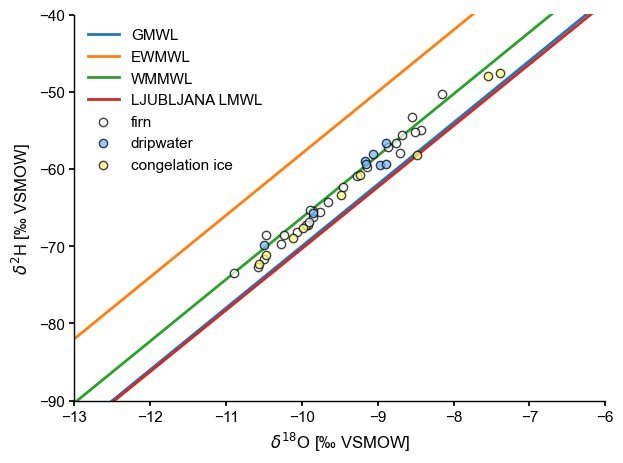

In [27]:
fig, ax = plt.subplots()

xi = np.arange(-20,0,0.5)

def WL(a,d):
    return lambda x: a*x+d

for d,l in zip((10,22,13.7),('GMWL','EWMWL','WMMWL')):
    f = WL(8,d)
    ax.plot(xi,f(xi), label = l)

f_lj = WL(coeffs['slope'],coeffs['intercept'])
ax.plot(xi,f_lj(xi), label = 'LJUBLJANA LMWL')
ax.scatter(firn.d18O,firn.d2H,color = 'white', edgecolor = 'black', zorder = 100, label = 'firn', alpha = 0.75)
ax.scatter(drip.d18O,drip.d2H,color = 'xkcd:sky blue', edgecolor = 'black', zorder = 100, label = 'dripwater', alpha = 0.75)
ax.scatter(congel.d18O,congel.d2H,color = 'xkcd:light yellow', edgecolor = 'black', zorder = 100, label = 'congelation ice', alpha = 0.75)


#f_va,coeffs_va = gnip.PWLSR(regional,'VILLACHER ALPE')
#ax.plot(xi,f_va(xi), label = 'VILLACHER ALPE LMWL')




ax.set_xlim(-13,-6)
ax.set_ylim(-90,-40)
ax.set_xlabel("$\delta^{18}$O [‰ VSMOW]")
ax.set_ylabel("$\delta^{2}$H [‰ VSMOW]")


ax.legend()
ax.grid()
plt.tight_layout()
pyleo.savefig(fig,'../reports/M17_manuscript/figures/sf11.pdf',settings = {'dpi':300})
pyleo.showfig(fig)
pyleo.closefig(fig)

## Linear mixing model between summer and winter precip

In [14]:
# solve equation with linear mixing model by Gaussian elimination 

def SolveA(wint,summ,firn):

    A  = np.array([[wint, summ, firn],[1,1,1]])
    A[0] = A[0]/A[0,0]
    A[1] = A[0]-A[1]
    A[1]  =A[1]/A[1,1]
    A[0]  = A[0]-A[1]*A[0,1]
    
    return(A[0,2],A[1,2])

In [15]:
# what are typical winter/summer values at ljubljana?

wint = lj.loc[(lj.index.month <= 4) | (lj.index.month > 10)].copy()
summ = lj.loc[(lj.index.month >= 5) & (lj.index.month < 11)].copy()

In [16]:
summ.O18.mean()-1.4

-8.263057176447674

In [17]:
# test the robustness of the mixing model
wint_d18O_var = np.random.normal(wint.O18.mean()-1.4,wint.O18.std(),10000)
summ_d18O_var = np.random.normal(summ.O18.mean()-1.4,summ.O18.std(),10000)

wint_d2H_var = np.random.normal(wint.H2.mean()-1.4,wint.H2.std(),10000)
summ_d2H_var = np.random.normal(summ.H2.mean()-7.6,summ.H2.std(),10000)

result_d18O = np.array([SolveA(wi,si,-9.55) for wi,si in zip(wint_d18O_var,summ_d18O_var) if (wi < -9.55) & (si > -9.55)]).transpose()
result_d2H = np.array([SolveA(wi,si,-63.28) for wi,si in zip(wint_d2H_var,summ_d2H_var) if (wi < -63.28) & (si > -63.28)]).transpose()

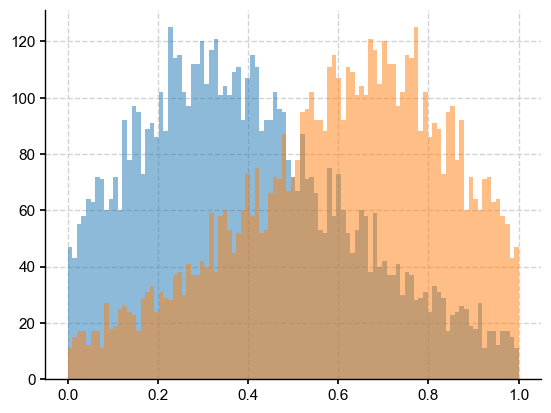

In [18]:
fig, ax = plt.subplots()
ax.hist(result_d18O[0], bins = np.linspace(0,1,100),alpha = 0.5)

ax.hist(result_d18O[1], bins = np.linspace(0,1,100), alpha = 0.5)

pyleo.showfig(fig)
pyleo.closefig(fig)

In [19]:
np.std(result_d18O[0])

0.23001064826330214

In [20]:
np.mean(result_d18O[0])

0.39492349341881855

In [21]:
np.std(result_d18O[1])

0.23001064826330214

In [22]:
np.mean(result_d18O[1])

0.6050765065811814

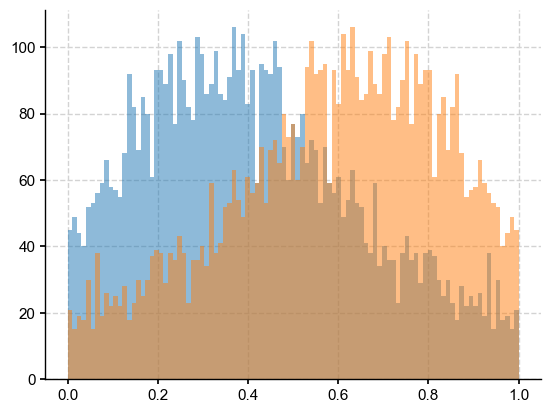

In [23]:
fig, ax = plt.subplots()
ax.hist(result_d2H[0], bins = np.linspace(0,1,100),alpha = 0.5)

ax.hist(result_d2H[1], bins = np.linspace(0,1,100), alpha = 0.5)

pyleo.showfig(fig)
pyleo.closefig(fig)

In [24]:
print(SolveA(wint.O18.mean()-1.4,summ.O18.mean()-1.4,-9.55))
print(SolveA(wint.H2.mean()-7.6,summ.H2.mean()-7.6,-63.28))

(0.3453865379049964, 0.6546134620950036)
(0.34191688104268203, 0.658083118957318)


In [25]:
print(SolveA(wint.O18.mean()-1.4,summ.O18.mean()-1.4,-9.55))
print(SolveA(wint.H2.mean()-7.6,summ.H2.mean()-7.6,-63.28))

(0.3453865379049964, 0.6546134620950036)
(0.34191688104268203, 0.658083118957318)
